In [16]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [17]:
df = pd.read_csv("All-time Table-Bangalore-Wards.csv")

In [18]:
df.head()

,Ward,Searches,Searches which got estimate,Searches for Quotes,Searches which got Quotes,Bookings,Completed Trips,Search-to-estimate Rate,Estimate-to-search for quotes Rate,Quote Acceptance Rate,Quote-to-booking Rate,Cancelled Bookings,Booking Cancellation Rate,Conversion Rate,Drivers' Earnings,Average Distance per Trip (km),Average Fare per Trip,Distance Travelled (km)
0,Other Wards,"30,71,626","27,12,391","18,90,877","9,75,708","9,54,414","5,89,585",88.3%,69.7%,51.6%,97.8%,"3,64,609",38.2%,19.2%,"₹12,00,07,713",10.37,₹175.04,"71,90,364"
1,Shantala Nagar,"24,01,161","23,84,599","20,67,653","8,56,568","8,41,607","4,74,271",99.3%,86.7%,41.4%,98.3%,"3,67,010",43.6%,19.8%,"₹7,11,77,412",7.48,₹138.74,"38,63,534"
2,Doddakanahalli,"17,27,250","17,11,471","14,56,511","5,96,480","5,87,089","3,50,792",99.1%,85.1%,40.9%,98.4%,"2,36,139",40.2%,20.3%,"₹5,92,11,778",9.02,₹159.54,"33,54,728"
3,Agara,"12,26,026","12,14,797","10,43,176","5,20,539","5,08,562","3,36,728",99.1%,85.9%,49.9%,97.7%,"1,71,714",33.8%,27.5%,"₹4,75,68,017",7.63,₹137.67,"26,33,026"
4,Koramangala,"11,69,452","11,58,300","9,94,218","5,28,008","5,15,062","3,34,904",99.1%,85.8%,53.1%,97.5%,"1,80,001",34.9%,28.6%,"₹4,45,96,808",6.97,₹128.74,"24,37,405"


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ward                                245 non-null    object 
 1   Searches                            245 non-null    object 
 2   Searches which got estimate         245 non-null    object 
 3   Searches for Quotes                 245 non-null    object 
 4   Searches which got Quotes           245 non-null    object 
 5   Bookings                            245 non-null    object 
 6   Completed Trips                     245 non-null    object 
 7   Search-to-estimate Rate             245 non-null    object 
 8   Estimate-to-search for quotes Rate  245 non-null    object 
 9   Quote Acceptance Rate               245 non-null    object 
 10  Quote-to-booking Rate               245 non-null    object 
 11  Cancelled Bookings                  245 non-n

In [20]:
df.columns

Index(['Ward', 'Searches', 'Searches which got estimate',
       'Searches for Quotes', 'Searches which got Quotes', 'Bookings',
       'Completed Trips', 'Search-to-estimate Rate',
       'Estimate-to-search for quotes Rate', 'Quote Acceptance Rate',
       'Quote-to-booking Rate', 'Cancelled Bookings',
       'Booking Cancellation Rate', 'Conversion Rate', 'Drivers' Earnings',
       'Average Distance per Trip (km)', 'Average Fare per Trip',
       'Distance Travelled (km)'],
      dtype='object')

In [21]:
df.describe()

,Average Distance per Trip (km)
count,245.000000
mean,7.411878
std,1.134803
min,5.010000
25%,6.580000
50%,7.220000
75%,8.190000
max,11.420000


In [22]:
df.isnull().mean()*100

Ward                                  0.0
Searches                              0.0
Searches which got estimate           0.0
Searches for Quotes                   0.0
Searches which got Quotes             0.0
Bookings                              0.0
Completed Trips                       0.0
Search-to-estimate Rate               0.0
Estimate-to-search for quotes Rate    0.0
Quote Acceptance Rate                 0.0
Quote-to-booking Rate                 0.0
Cancelled Bookings                    0.0
Booking Cancellation Rate             0.0
Conversion Rate                       0.0
Drivers' Earnings                     0.0
Average Distance per Trip (km)        0.0
Average Fare per Trip                 0.0
Distance Travelled (km)               0.0
dtype: float64

In [23]:
cols_with_commas = df[["Searches","Searches which got estimate","Searches for Quotes","Searches which got Quotes","Bookings","Completed Trips","Cancelled Bookings","Distance Travelled (km)"]] 

for cols in cols_with_commas:
    df[cols] = df[cols].str.replace(",","").astype(int)

In [24]:
rate_cols = df[["Search-to-estimate Rate","Estimate-to-search for quotes Rate","Quote Acceptance Rate","Quote-to-booking Rate","Booking Cancellation Rate","Conversion Rate"]]

for cols in rate_cols:
    df[cols] = df[cols].str.replace("%","").astype(float)

In [25]:
df["Drivers\' Earnings"] = df["Drivers' Earnings"].str.replace("₹","").str.replace(",","").astype(int)

In [26]:
df["Average Fare per Trip"] = df["Average Fare per Trip"].str.replace("₹","").astype(float)

In [27]:
df.head()

,Ward,Searches,Searches which got estimate,Searches for Quotes,Searches which got Quotes,Bookings,Completed Trips,Search-to-estimate Rate,Estimate-to-search for quotes Rate,Quote Acceptance Rate,Quote-to-booking Rate,Cancelled Bookings,Booking Cancellation Rate,Conversion Rate,Drivers' Earnings,Average Distance per Trip (km),Average Fare per Trip,Distance Travelled (km)
0,Other Wards,3071626,2712391,1890877,975708,954414,589585,88.3,69.7,51.6,97.8,364609,38.2,19.2,120007713,10.37,175.04,7190364
1,Shantala Nagar,2401161,2384599,2067653,856568,841607,474271,99.3,86.7,41.4,98.3,367010,43.6,19.8,71177412,7.48,138.74,3863534
2,Doddakanahalli,1727250,1711471,1456511,596480,587089,350792,99.1,85.1,40.9,98.4,236139,40.2,20.3,59211778,9.02,159.54,3354728
3,Agara,1226026,1214797,1043176,520539,508562,336728,99.1,85.9,49.9,97.7,171714,33.8,27.5,47568017,7.63,137.67,2633026
4,Koramangala,1169452,1158300,994218,528008,515062,334904,99.1,85.8,53.1,97.5,180001,34.9,28.6,44596808,6.97,128.74,2437405


In [28]:
funnel_cols = [
    'Searches',
    'Searches which got estimate',
    'Searches for Quotes',
    'Searches which got Quotes',
    'Bookings',
    'Completed Trips'
]

df[funnel_cols].sum()


Searches                       134668128
Searches which got estimate    132886102
Searches for Quotes            105832744
Searches which got Quotes       60035510
Bookings                        58907026
Completed Trips                 37257162
dtype: int64

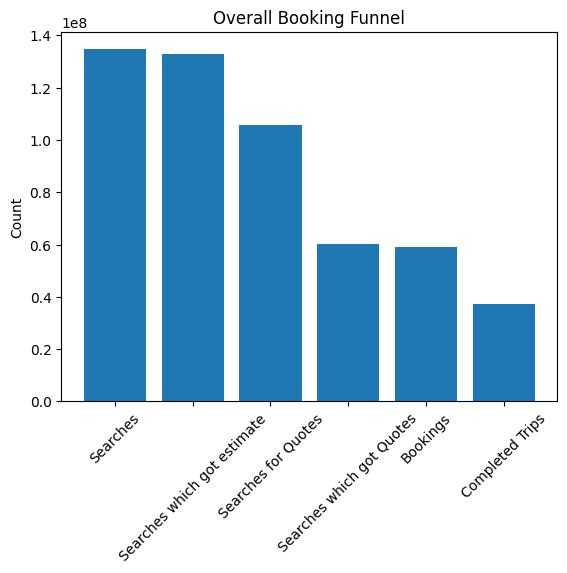

In [29]:
plt.bar(funnel_cols, df[funnel_cols].sum())
plt.title("Overall Booking Funnel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


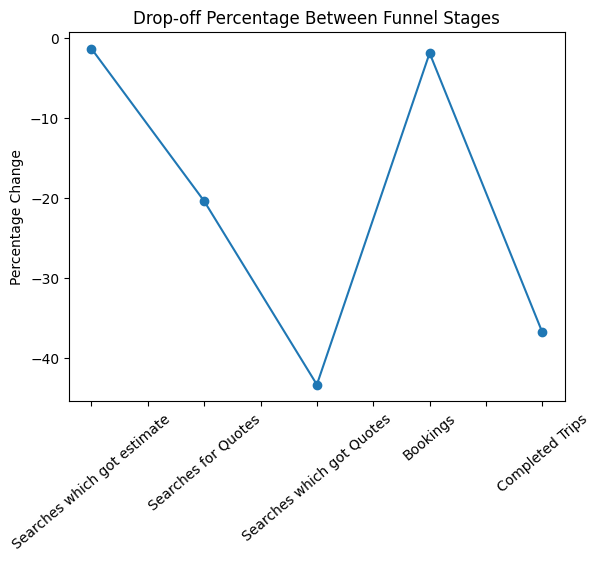

In [30]:
drop_off = df[funnel_cols].sum().pct_change() * 100

drop_off.plot(marker='o')
plt.title("Drop-off Percentage Between Funnel Stages")
plt.ylabel("Percentage Change")
plt.xticks(rotation=40)
plt.show()


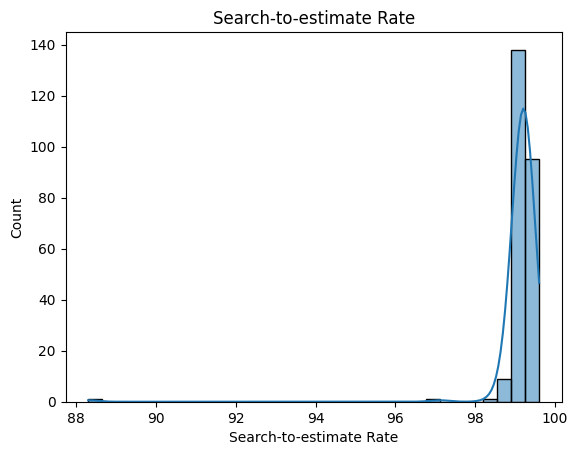

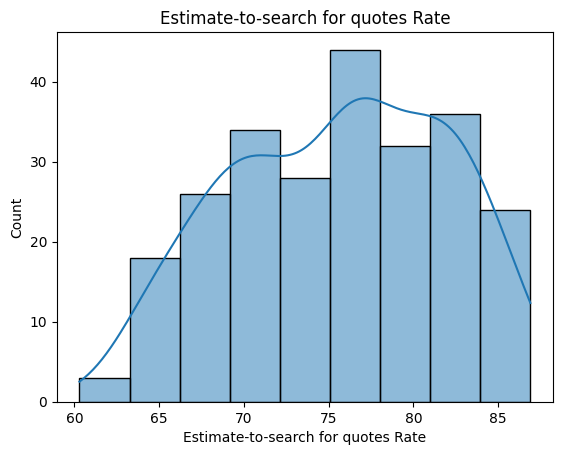

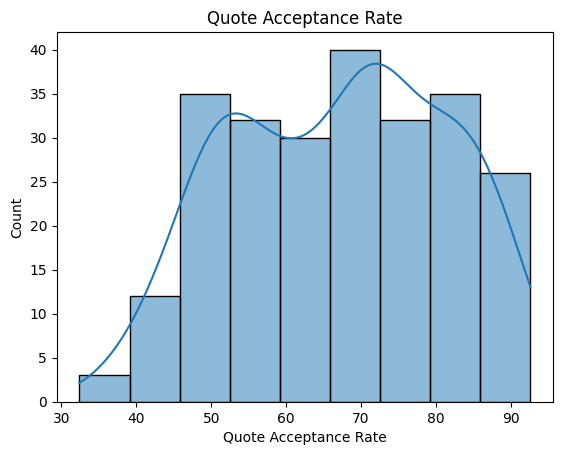

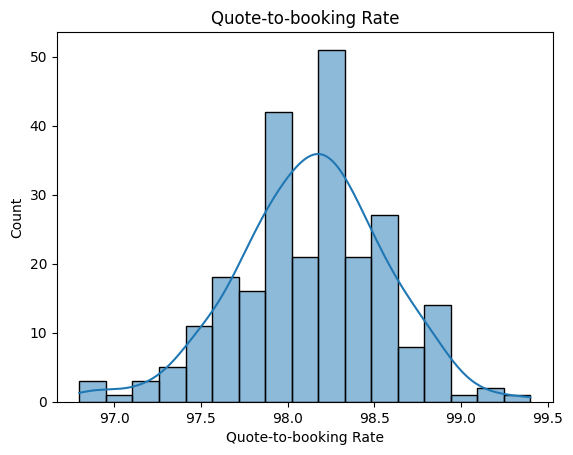

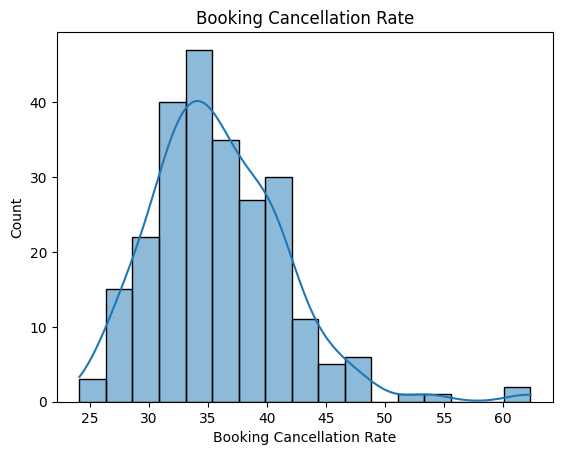

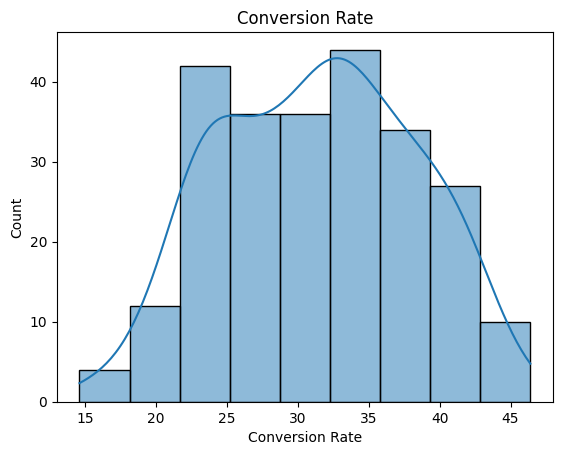

In [33]:
for cols in rate_cols:
    sns.histplot(df[cols],kde= True)
    plt.title(cols)
    plt.show()
   

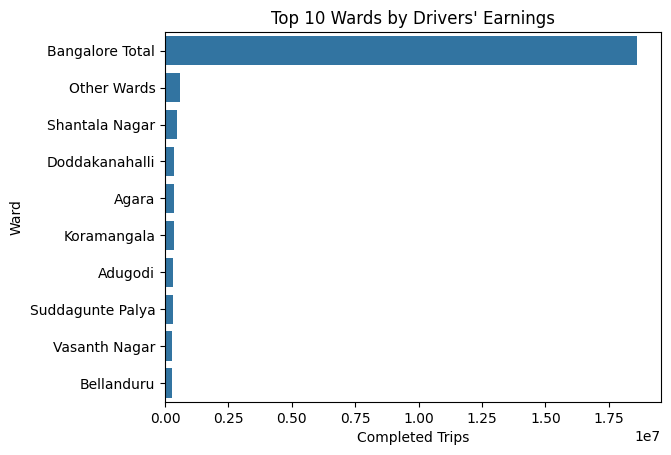

In [36]:
sns.barplot(
    x = "Completed Trips",
    y = "Ward",
    data=df.sort_values("Completed Trips",ascending=False).head(10)
)
plt.title("Top 10 Wards by Drivers' Earnings")
plt.show()

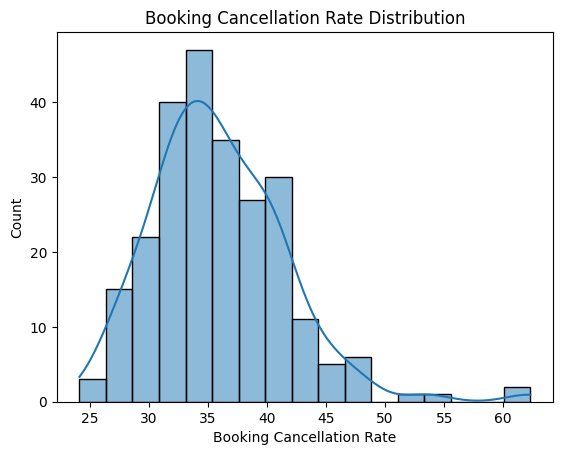

In [38]:
sns.histplot(df["Booking Cancellation Rate"],kde=True)
plt.title("Booking Cancellation Rate Distribution")
plt.show()

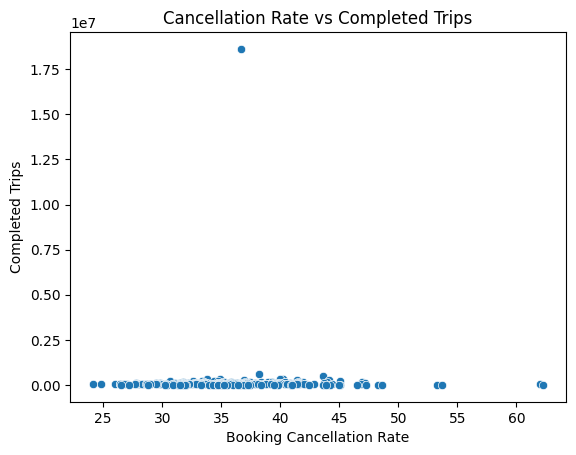

In [39]:
sns.scatterplot(
    x='Booking Cancellation Rate',
    y='Completed Trips',
    data=df
)
plt.title("Cancellation Rate vs Completed Trips")
plt.show()


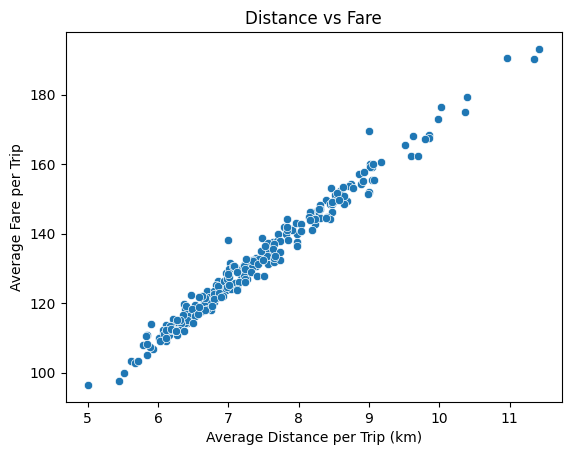

In [40]:
sns.scatterplot(
    x='Average Distance per Trip (km)',
    y='Average Fare per Trip',
    data=df
)
plt.title("Distance vs Fare")
plt.show()


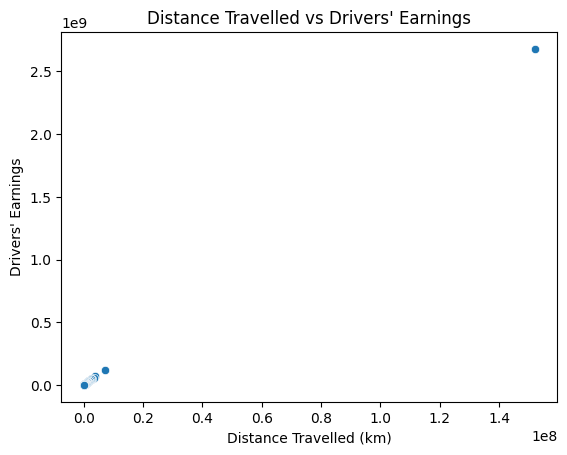

In [41]:
sns.scatterplot(
    x='Distance Travelled (km)',
    y="Drivers' Earnings",
    data=df
)
plt.title("Distance Travelled vs Drivers' Earnings")
plt.show()


In [42]:
numeric_col = df.drop(columns="Ward")

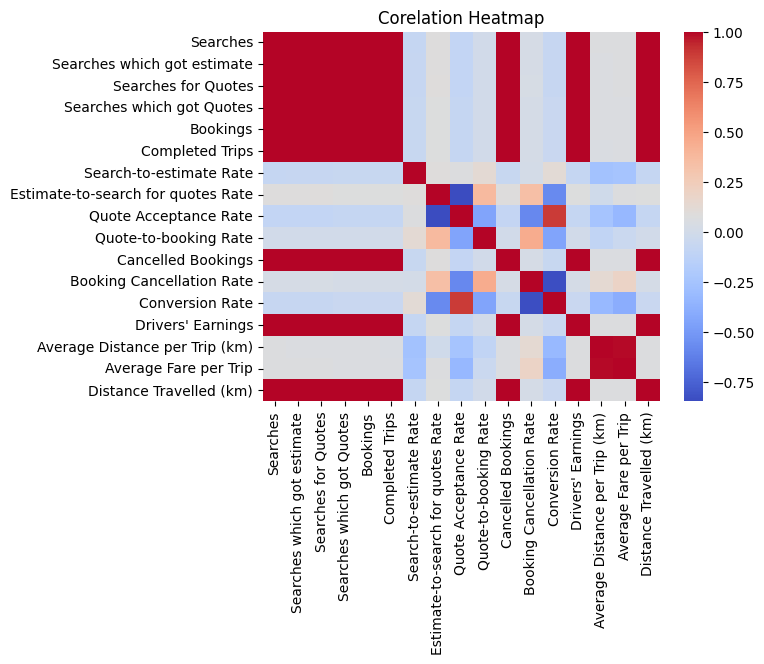

In [46]:
sns.heatmap(numeric_col.corr(),cmap="coolwarm",annot=False)
plt.title("Corelation Heatmap")
plt.show()